In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing_final.csv", sep=";")
df = df.drop(columns=["renta_es_proyeccion", "renta_neta_anual"])

df.head()

,ccaa,provincia,anio,precio_compra_m2,precio_alquiler_m2,renta_mensual_neta,tipo_interes_hipoteca
0,Andalucia,Almería,2020,1082.6667,6.1083,809.0833,2.2333
1,Andalucia,Almería,2021,1082.4167,6.3000,841.9167,1.9904
2,Andalucia,Almería,2022,1116.5833,6.8000,883.7500,2.1038
3,Andalucia,Almería,2023,1174.7500,7.2333,961.9167,3.2812
4,Andalucia,Almería,2024,1254.8333,7.7750,1019.2206,3.4529


In [3]:
# Parámetros del modelo de hogar / vivienda
HOUSE_SIZE_M2 = 70
N_SALARIOS_HOGAR = 1.5
TASA_AHORRO = 0.20      # 20% de los ingresos anuales
PCT_ENTRADA = 0.20      # 20% del precio de la vivienda
PCT_HIPOTECA = 0.80     # 80% financiado
PLAZO_ANIOS = 25

# Ingresos del hogar
df["ingresos_hogar_mensuales"] = df["renta_mensual_neta"] * N_SALARIOS_HOGAR
df["ingresos_hogar_anuales"] = df["ingresos_hogar_mensuales"] * 12

# Vivienda tipo
df["precio_vivienda_tipo"] = df["precio_compra_m2"] * HOUSE_SIZE_M2
df["alquiler_vivienda_tipo_mensual"] = df["precio_alquiler_m2"] * HOUSE_SIZE_M2

# 1) Esfuerzo de alquiler
df["esfuerzo_alquiler_pct"] = (
    df["alquiler_vivienda_tipo_mensual"] / df["ingresos_hogar_mensuales"] * 100
)

# 2) Años para ahorrar la entrada
df["entrada_necesaria"] = df["precio_vivienda_tipo"] * PCT_ENTRADA
df["ahorro_anual_posible"] = df["ingresos_hogar_anuales"] * TASA_AHORRO
df["anios_ahorrar_entrada"] = df["entrada_necesaria"] / df["ahorro_anual_posible"]

# 3) Esfuerzo cuota hipotecaria
def cuota_mensual(principal, interes_anual, plazo_anios):
    r = interes_anual / 100 / 12
    n = plazo_anios * 12
    if r == 0:
        return principal / n
    return principal * (r * (1 + r) ** n) / ((1 + r) ** n - 1)

df["principal_hipoteca"] = df["precio_vivienda_tipo"] * PCT_HIPOTECA
df["cuota_hipoteca_mensual"] = df.apply(
    lambda row: cuota_mensual(
        row["principal_hipoteca"],
        row["tipo_interes_hipoteca"],
        PLAZO_ANIOS,
    ),
    axis=1,
)
df["esfuerzo_cuota_pct"] = (
    df["cuota_hipoteca_mensual"] / df["ingresos_hogar_mensuales"] * 100
)


In [4]:
df.head()

,ccaa,provincia,anio,precio_compra_m2,precio_alquiler_m2,renta_mensual_neta,tipo_interes_hipoteca,ingresos_hogar_mensuales,ingresos_hogar_anuales,precio_vivienda_tipo,alquiler_vivienda_tipo_mensual,esfuerzo_alquiler_pct,entrada_necesaria,ahorro_anual_posible,anios_ahorrar_entrada,principal_hipoteca,cuota_hipoteca_mensual,esfuerzo_cuota_pct
0,Andalucia,Almería,2020,1082.6667,6.1083,809.0833,2.2333,1213.62495,14563.4994,75786.669,427.581,35.231725,15157.3338,2912.69988,5.203878,60629.3352,263.921971,21.746584
1,Andalucia,Almería,2021,1082.4167,6.3000,841.9167,1.9904,1262.87505,15154.5006,75769.169,441.000,34.920319,15153.8338,3030.90012,4.999780,60615.3352,256.637526,20.321688
2,Andalucia,Almería,2022,1116.5833,6.8000,883.7500,2.1038,1325.62500,15907.5000,78160.831,476.000,35.907591,15632.1662,3181.50000,4.913458,62528.6648,268.201656,20.232091
3,Andalucia,Almería,2023,1174.7500,7.2333,961.9167,3.2812,1442.87505,17314.5006,82232.500,506.331,35.091812,16446.5000,3462.90012,4.749343,65786.0000,321.671153,22.293764
4,Andalucia,Almería,2024,1254.8333,7.7750,1019.2206,3.4529,1528.83090,18345.9708,87838.331,544.250,35.599097,17567.6662,3669.19416,4.787881,70270.6648,350.018945,22.894549


In [5]:
# Info general
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ccaa                            312 non-null    object 
 1   provincia                       312 non-null    object 
 2   anio                            312 non-null    int64  
 3   precio_compra_m2                312 non-null    float64
 4   precio_alquiler_m2              312 non-null    float64
 5   renta_mensual_neta              312 non-null    float64
 6   tipo_interes_hipoteca           312 non-null    float64
 7   ingresos_hogar_mensuales        312 non-null    float64
 8   ingresos_hogar_anuales          312 non-null    float64
 9   precio_vivienda_tipo            312 non-null    float64
 10  alquiler_vivienda_tipo_mensual  312 non-null    float64
 11  esfuerzo_alquiler_pct           312 non-null    float64
 12  entrada_necesaria               312 

,anio,precio_compra_m2,precio_alquiler_m2,renta_mensual_neta,tipo_interes_hipoteca,ingresos_hogar_mensuales,ingresos_hogar_anuales,precio_vivienda_tipo,alquiler_vivienda_tipo_mensual,esfuerzo_alquiler_pct,entrada_necesaria,ahorro_anual_posible,anios_ahorrar_entrada,principal_hipoteca,cuota_hipoteca_mensual,esfuerzo_cuota_pct
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2022.500000,1554.559459,8.702123,1166.704229,2.689433,1750.056344,21000.676131,108819.162128,609.148593,34.641203,21763.832426,4200.135226,5.139931,87055.329703,401.021158,22.608497
std,1.710569,726.859921,2.931579,185.843307,0.595570,278.764960,3345.179526,50880.194443,205.210557,9.173729,10176.038889,669.035905,2.032612,40704.155554,195.284626,9.090551
min,2020.000000,741.200000,4.758300,809.083300,1.990400,1213.624950,14563.499400,51884.000000,333.081000,22.455752,10376.800000,2912.699880,2.464689,41507.200000,180.944376,11.312839
25%,2021.000000,1079.333325,6.752050,1039.979200,2.103800,1559.968800,18719.625600,75553.332750,472.643500,27.829028,15110.666550,3743.925120,3.814285,60442.666200,268.753773,16.262472
50%,2022.500000,1334.708350,7.920850,1153.166700,2.654150,1729.750050,20757.000600,93429.584500,554.459500,32.686095,18685.916900,4151.400120,4.465551,74743.667600,340.232871,19.214897
75%,2024.000000,1765.395850,9.745850,1289.817775,3.281200,1934.726662,23216.719950,123577.709500,682.209500,39.360218,24715.541900,4643.343990,6.274598,98862.167600,460.385284,26.987201
max,2025.000000,4935.000000,20.390000,1842.911100,3.452900,2764.366650,33172.399800,345450.000000,1427.300000,63.470403,69090.000000,6634.479960,13.602762,276360.000000,1321.336326,62.436210


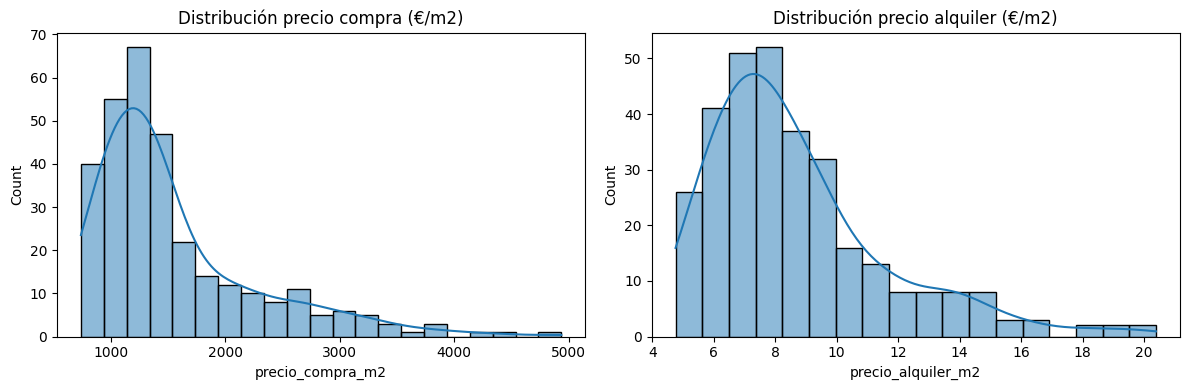

In [6]:
# Distribución de precios (compra y alquiler)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df["precio_compra_m2"], kde=True, ax=axes[0])
axes[0].set_title("Distribución precio compra (€/m2)")

sns.histplot(df["precio_alquiler_m2"], kde=True, ax=axes[1])
axes[1].set_title("Distribución precio alquiler (€/m2)")

plt.tight_layout()
plt.show()


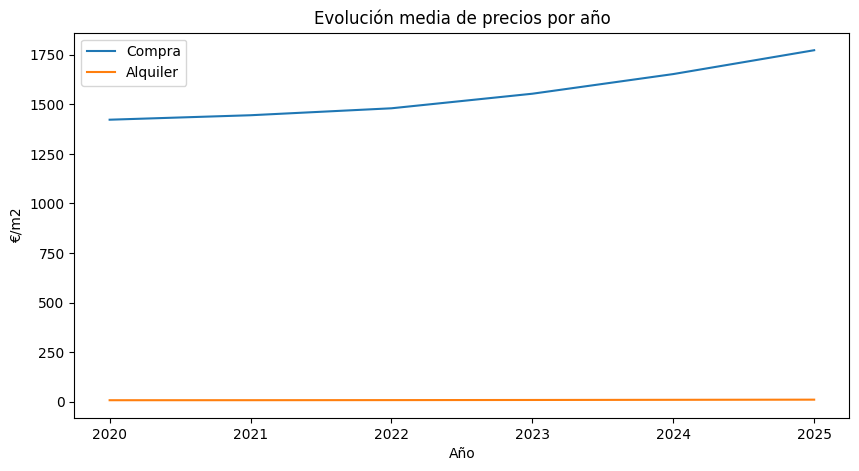

In [7]:
# Evolución temporal media por año
precios_anio = df.groupby("anio")[["precio_compra_m2", "precio_alquiler_m2"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(precios_anio["anio"], precios_anio["precio_compra_m2"], label="Compra")
plt.plot(precios_anio["anio"], precios_anio["precio_alquiler_m2"], label="Alquiler")
plt.legend()
plt.xlabel("Año")
plt.ylabel("€/m2")
plt.title("Evolución media de precios por año")
plt.show()


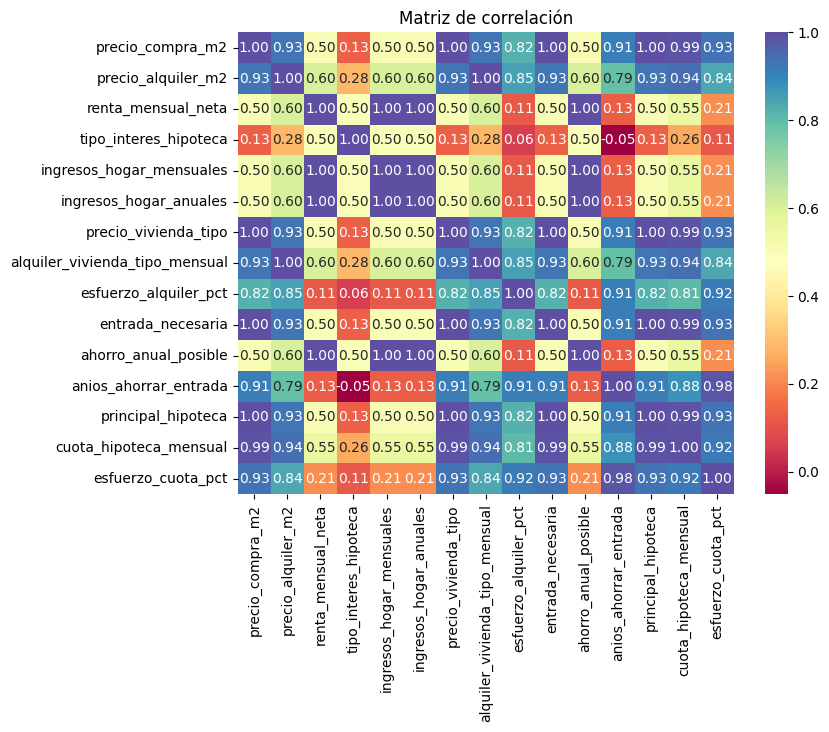

In [14]:
# Correlaciones numéricas
num_cols = ["precio_compra_m2", "precio_alquiler_m2", "renta_mensual_neta",
            "tipo_interes_hipoteca", "ingresos_hogar_mensuales", 
            "ingresos_hogar_anuales", "precio_vivienda_tipo",
            "alquiler_vivienda_tipo_mensual", "esfuerzo_alquiler_pct",
            "entrada_necesaria", "ahorro_anual_posible", "anios_ahorrar_entrada",
            "principal_hipoteca", "cuota_hipoteca_mensual", "esfuerzo_cuota_pct"] 

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="Spectral")
plt.title("Matriz de correlación")
plt.show()


Compra y alquiler se mueven juntísimos. Si se modela uno, metes el otro como predictor.

La renta influye claramente (0.50–0.60).

Los tipos de interés tienen relación baja → normal: España ha tenido tipos bajos hasta 2022 y la subida es reciente, por lo que aún no hay tiempo para que afecten fuerte al dataset.

Cuidado: Si haces regresión, precio_compra y precio_alquiler están muy correlados (0.93) → colinealidad fuerte.

In [20]:
# Análisis por provincia

df.groupby("provincia")[["precio_compra_m2", "precio_alquiler_m2"]].mean().sort_values("precio_compra_m2", ascending=False).head(10)

,precio_compra_m2,precio_alquiler_m2
provincia,,
Baleares,3831.736133,14.852483
Gipúzcoa,3404.791650,14.666117
Madrid,3234.527800,15.893883
Málaga,2870.605567,12.410550
Vizcaya,2742.080550,12.601383
Barcelona,2703.933333,16.338617
Tenerife,2343.163900,11.301667
Girona,2222.700000,11.187217
Álava,2217.950000,10.516117


<Axes: xlabel='renta_mensual_neta', ylabel='precio_alquiler_m2'>

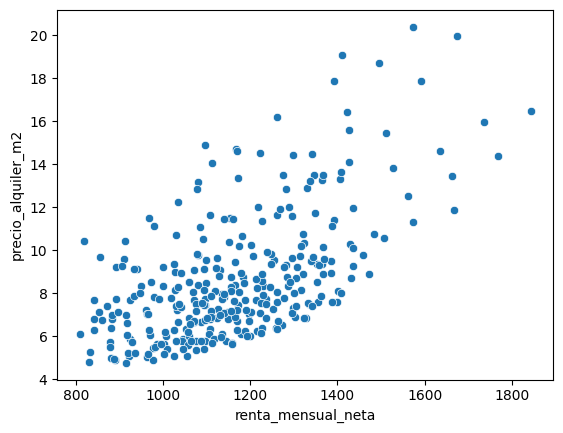

In [22]:
# Relación precio - venta

sns.scatterplot(data=df, x="renta_mensual_neta", y="precio_alquiler_m2")

<Axes: xlabel='renta_neta_anual', ylabel='precio_compra_m2'>

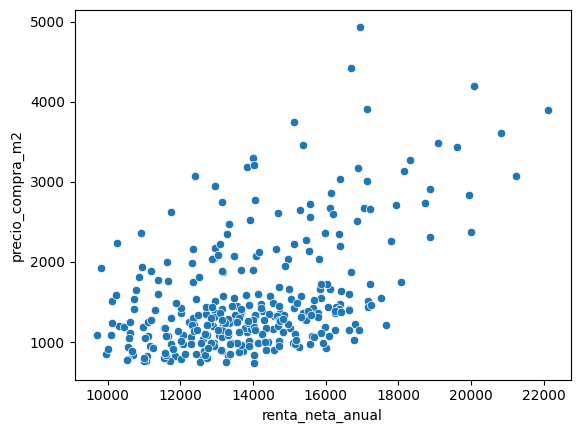

In [ ]:
sns.scatterplot(data=df, x="renta_neta_anual", y="precio_compra_m2")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Andalucia'),
  Text(1, 0, 'Aragon'),
  Text(2, 0, 'Asturias'),
  Text(3, 0, 'Baleares'),
  Text(4, 0, 'Canarias'),
  Text(5, 0, 'Cantabria'),
  Text(6, 0, 'CastillaLaMancha'),
  Text(7, 0, 'CastillaLeon'),
  Text(8, 0, 'Cataluña'),
  Text(9, 0, 'Ceuta'),
  Text(10, 0, 'ComunidadDeMadrid'),
  Text(11, 0, 'ComunidadValenciana'),
  Text(12, 0, 'Euskadi'),
  Text(13, 0, 'Extremadura'),
  Text(14, 0, 'Galicia'),
  Text(15, 0, 'La Rioja'),
  Text(16, 0, 'Melilla'),
  Text(17, 0, 'Murcia'),
  Text(18, 0, 'Navarra')])

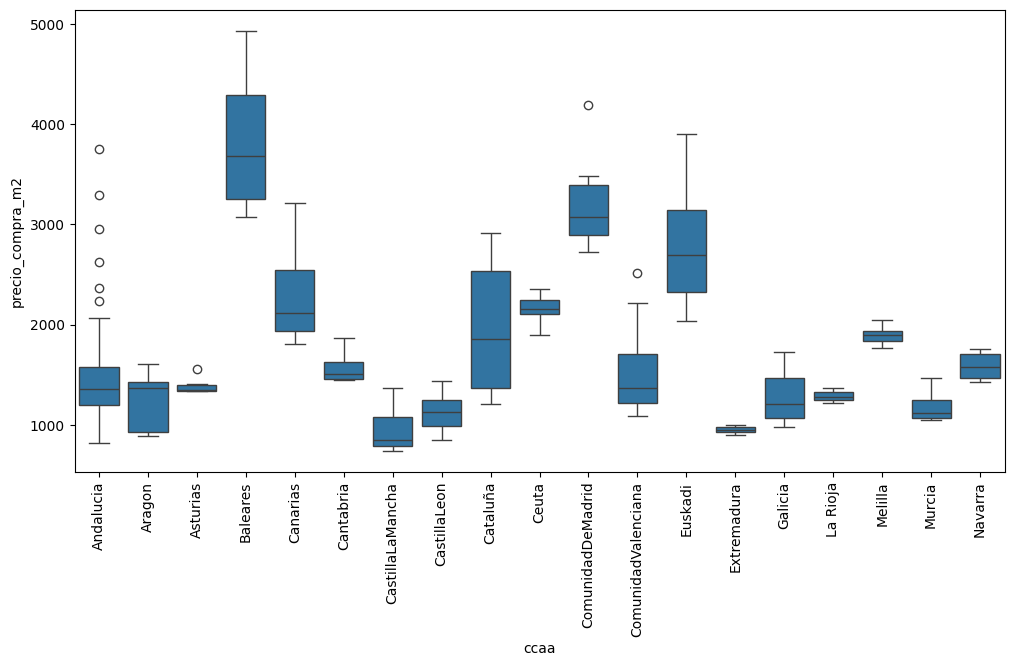

In [24]:
# Boxplots por comunidad autónoma

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="ccaa", y="precio_compra_m2")
plt.xticks(rotation=90)


In [25]:
# Colinealidad

import statsmodels.api as sm

sm.OLS(df["precio_compra_m2"], sm.add_constant(df[["precio_alquiler_m2","renta_neta_anual","tipo_interes_hipoteca"]])).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       precio_compra_m2   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     752.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          2.37e-141
Time:                        19:09:15   Log-Likelihood:                -2167.3
No. Observations:                 312   AIC:                             4343.
Df Residuals:                     308   BIC:                             4358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -15.9065     95.182     -0.167      0.867    -203.197     171.384
precio_alquiler_m2      242.6559      6.143     39.500      0.000     230.568     254.744
renta_neta_anual         -0.0065      0.009     -0.732      0.465      -0.024       0.011
tipo_interes_hipoteca  -167.2165     27.789     -6.017      0.000    -221.897    -112.536
==============================================================================
Omnibus:                       51.044   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.918
Skew:                          -0.398   Prob(JB):                     3.82e-77
Kurtosis:                       8.142   Cond. No.                     9.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# se acaba eliminando la renta neta anual, porque la mensual tiene mayora aplicacion en modelos explicativos

df = df.drop(columns=["renta_neta_anual"])
